In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

In [2]:
from utils import plot_wigner, plot_qfunc, plot_spin_qfunc

# Qubit

In [3]:
N = 2 # Qubits are two-level systems
gain_amp = 0.1
loss_amp = 1

In [4]:
gain = 0.5 * gain_amp * lindblad_dissipator(sigmap())
loss = 0.5 * loss_amp * lindblad_dissipator(sigmam())

In [5]:
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2*np.pi, 100)

## Steady States
### Rotating Frame $H=0$

In [6]:
H0 = Qobj(np.zeros([N, N]))
sstate = steadystate(H0, [gain, loss])
sstate

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.09090909 0.        ]
 [0.         0.90909091]]

In [7]:
# b = Bloch3d()
# b.add_states([0.5*basis(2) + 0.5*basis(2, 1)])
# b.show()

(array([[0.28937262, 0.28930706, 0.28911045, ..., 0.02919943, 0.02900282,
         0.02893726],
        [0.28937262, 0.28930706, 0.28911045, ..., 0.02919943, 0.02900282,
         0.02893726],
        [0.28937262, 0.28930706, 0.28911045, ..., 0.02919943, 0.02900282,
         0.02893726],
        ...,
        [0.28937262, 0.28930706, 0.28911045, ..., 0.02919943, 0.02900282,
         0.02893726],
        [0.28937262, 0.28930706, 0.28911045, ..., 0.02919943, 0.02900282,
         0.02893726],
        [0.28937262, 0.28930706, 0.28911045, ..., 0.02919943, 0.02900282,
         0.02893726]]),
 (<AxesSubplot:xlabel='$\\varphi$', ylabel='$\\theta$'>,
  <matplotlib.collections.QuadMesh at 0x1e46cfcebe0>))

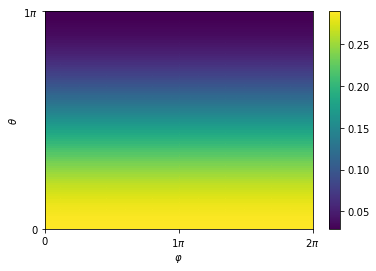

In [12]:
plot_spin_qfunc(sstate, theta, phi)

### Signal

In [9]:
detuning = 0
signal_strength = 2 * min(gain_amp, loss_amp)
H = 0.5 * (detuning*sigmaz() + signal_strength*sigmay())
signal_sstate = steadystate(H, [gain, loss])
signal_sstate

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.17647059 -0.23529412]
 [-0.23529412  0.82352941]]

(array([[0.26213755, 0.2597094 , 0.25717999, ..., 0.05162944, 0.05384787,
         0.05617233],
        [0.26213755, 0.25971418, 0.25718955, ..., 0.05163901, 0.05385266,
         0.05617233],
        [0.26213755, 0.25972851, 0.25721821, ..., 0.05166766, 0.05386699,
         0.05617233],
        ...,
        [0.26213755, 0.25972851, 0.25721821, ..., 0.05166766, 0.05386699,
         0.05617233],
        [0.26213755, 0.25971418, 0.25718955, ..., 0.05163901, 0.05385266,
         0.05617233],
        [0.26213755, 0.2597094 , 0.25717999, ..., 0.05162944, 0.05384787,
         0.05617233]]),
 (<AxesSubplot:xlabel='$\\varphi$', ylabel='$\\theta$'>,
  <matplotlib.collections.QuadMesh at 0x1e46cf72fd0>))

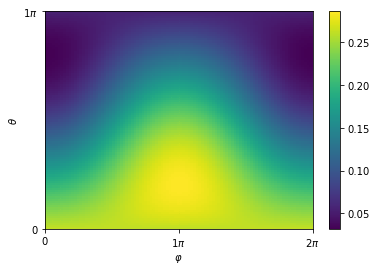

In [11]:
plot_spin_qfunc(signal_sstate, theta, phi)